In [2]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [27]:
df = pd.read_csv('usage_by_weather.csv')
df

,Unnamed: 0.1,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


In [28]:
# 결측치 유무 확인
df.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
year              0
month             0
day               0
temp              0
cloud             0
rainfall_total    0
Humidity_mean     0
solar             0
customer          0
demand_max(Wh)    0
usage(kWh)        0
dtype: int64

In [33]:
# 데이터 기초통계량 확인
df['demand_max(Wh)'].min()
# df['demand_max(Wh)'].max()

'1,076,574,227.21'

In [25]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'year', 'month', 'day', 'temp', 'cloud',
       'rainfall_total', 'Humidity_mean', 'solar', 'customer',
       'demand_max(Wh)', 'usage(kWh)'],
      dtype='object')

## 1. matplotlib 산점도

In [19]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

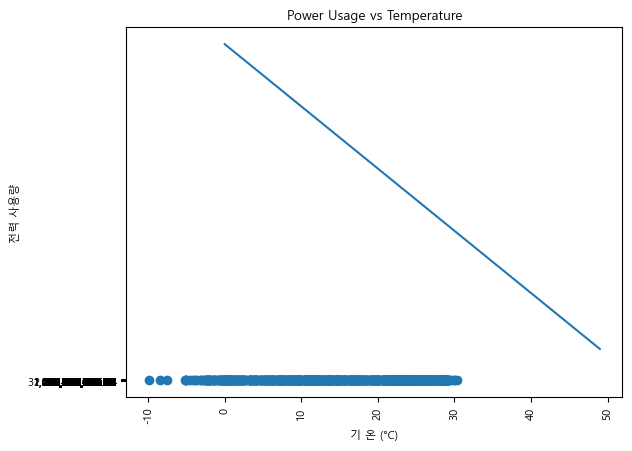

AttributeError: This method only works with the ScalarFormatter

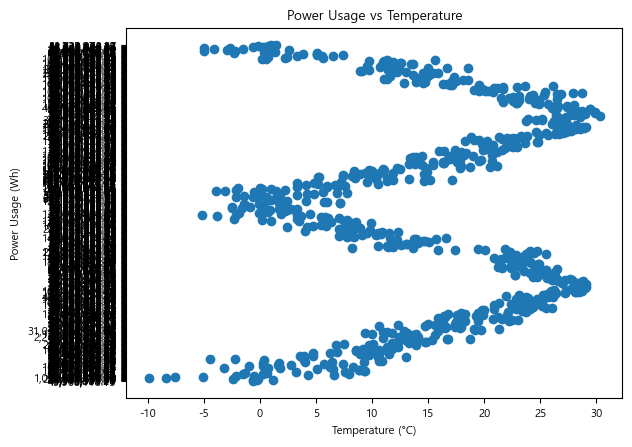

In [47]:
# 기온, 사용량
plt.scatter(df['temp'], df['demand_max(Wh)'])
plt.xlabel('기 온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.plot(list(np.round(np.linspace(1076574227.21, 99991210.32))))
plt.xticks(rotation = 90)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['temp'], df['demand_max(Wh)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Usage (Wh)')
plt.title('Power Usage vs Temperature')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useOffset=False, useMathText=True)
plt.ylim(1076574227.21, 99991210.32)
plt.show()

# 습도, 사용량
plt.scatter(df['Humidity_mean'], df['demand_max(Wh)'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(df['rainfall_total'], df['demand_max(Wh)'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(df['cloud'], df['demand_max(Wh)'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(df['solar'], df['demand_max(Wh)'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# x,y값 범위 찾아서 linsplace 으로 y값 지정

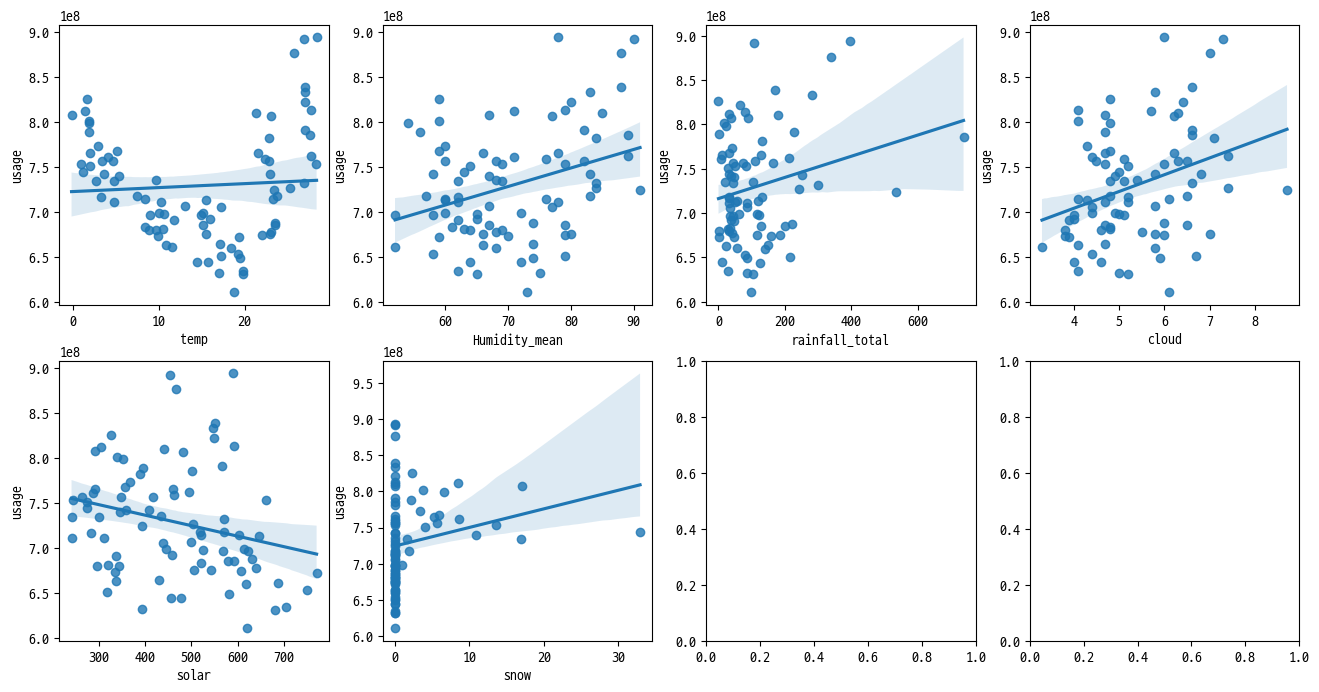

In [104]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
for i , feature in enumerate(weather_df):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'usage', data = df, ax = axs[row][col])

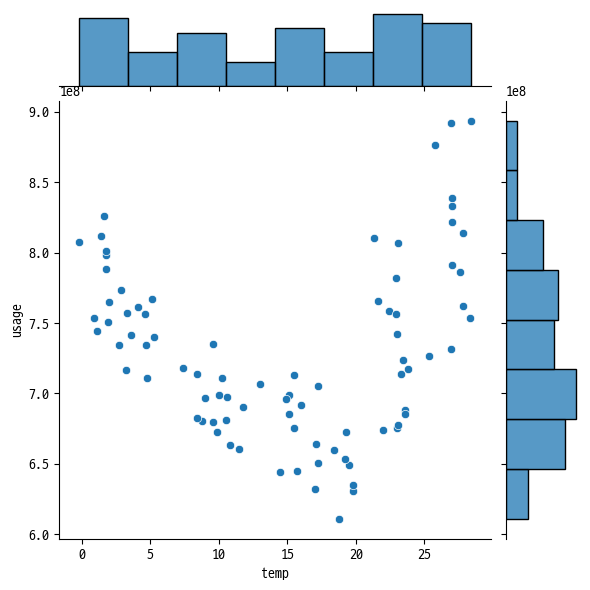

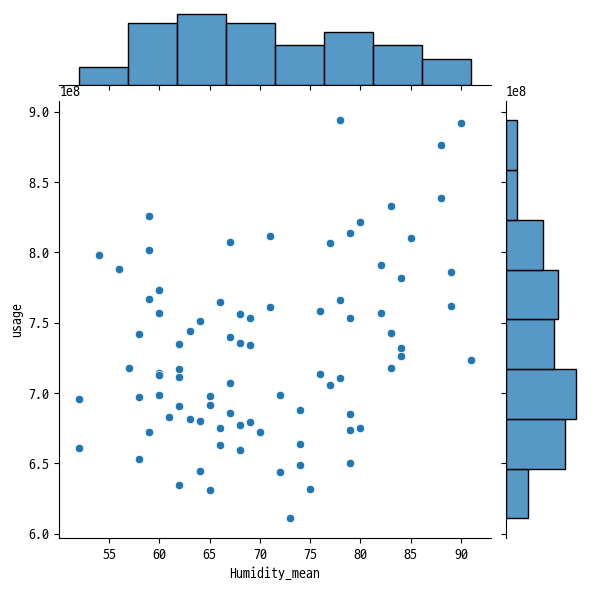

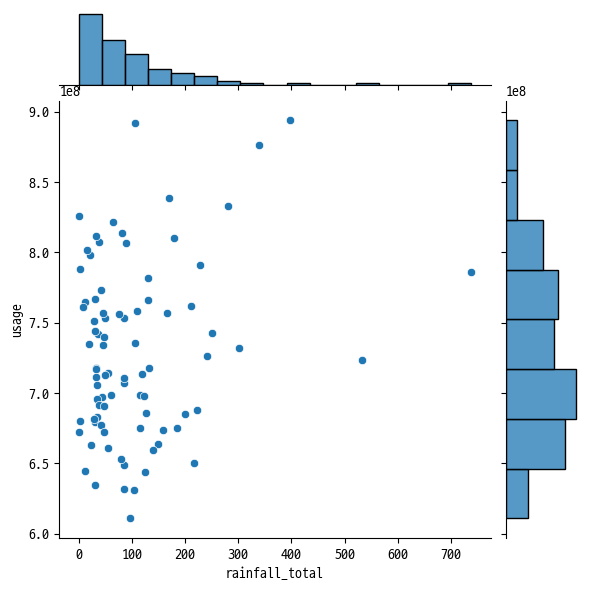

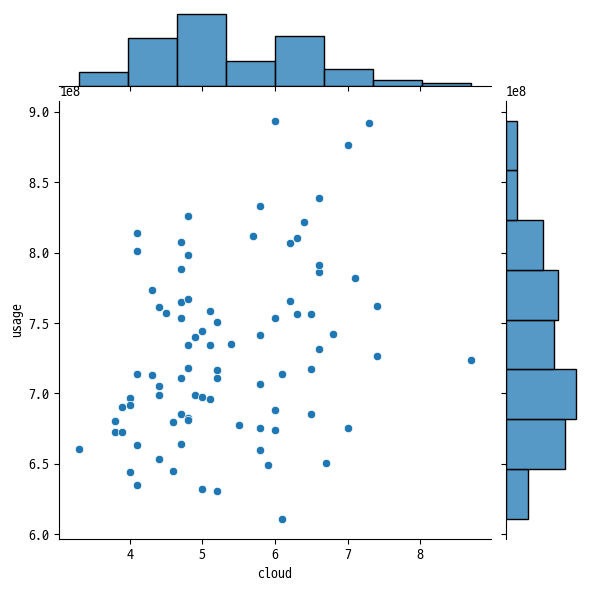

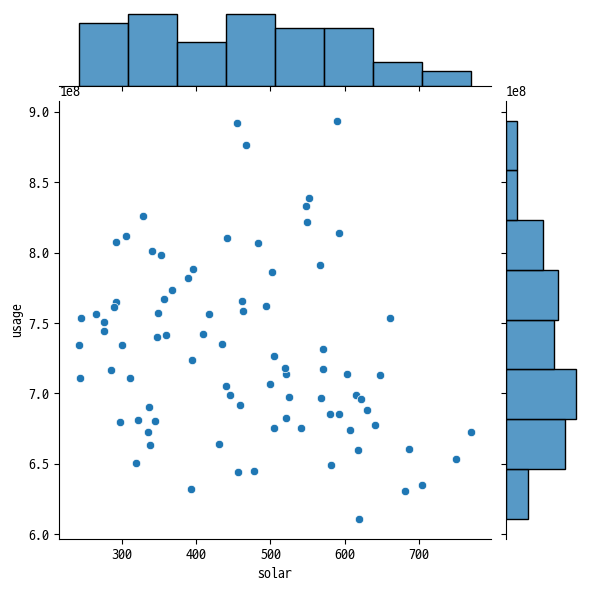

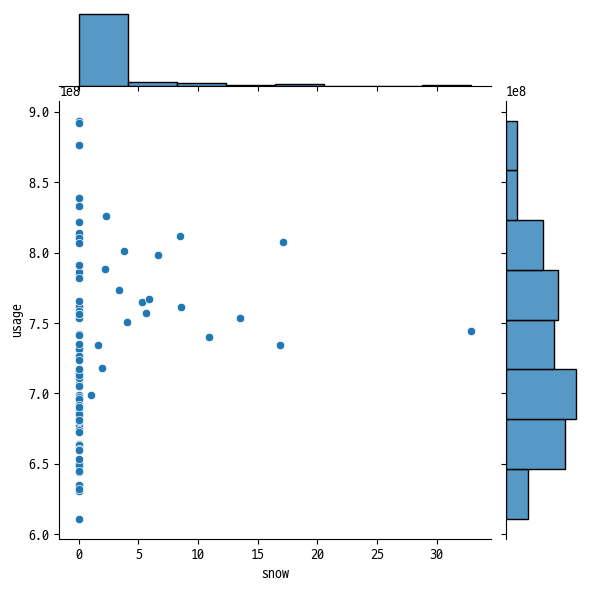

In [105]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']

for feature in weather_df:
    sns.jointplot(x = feature, y = 'usage', data = df)

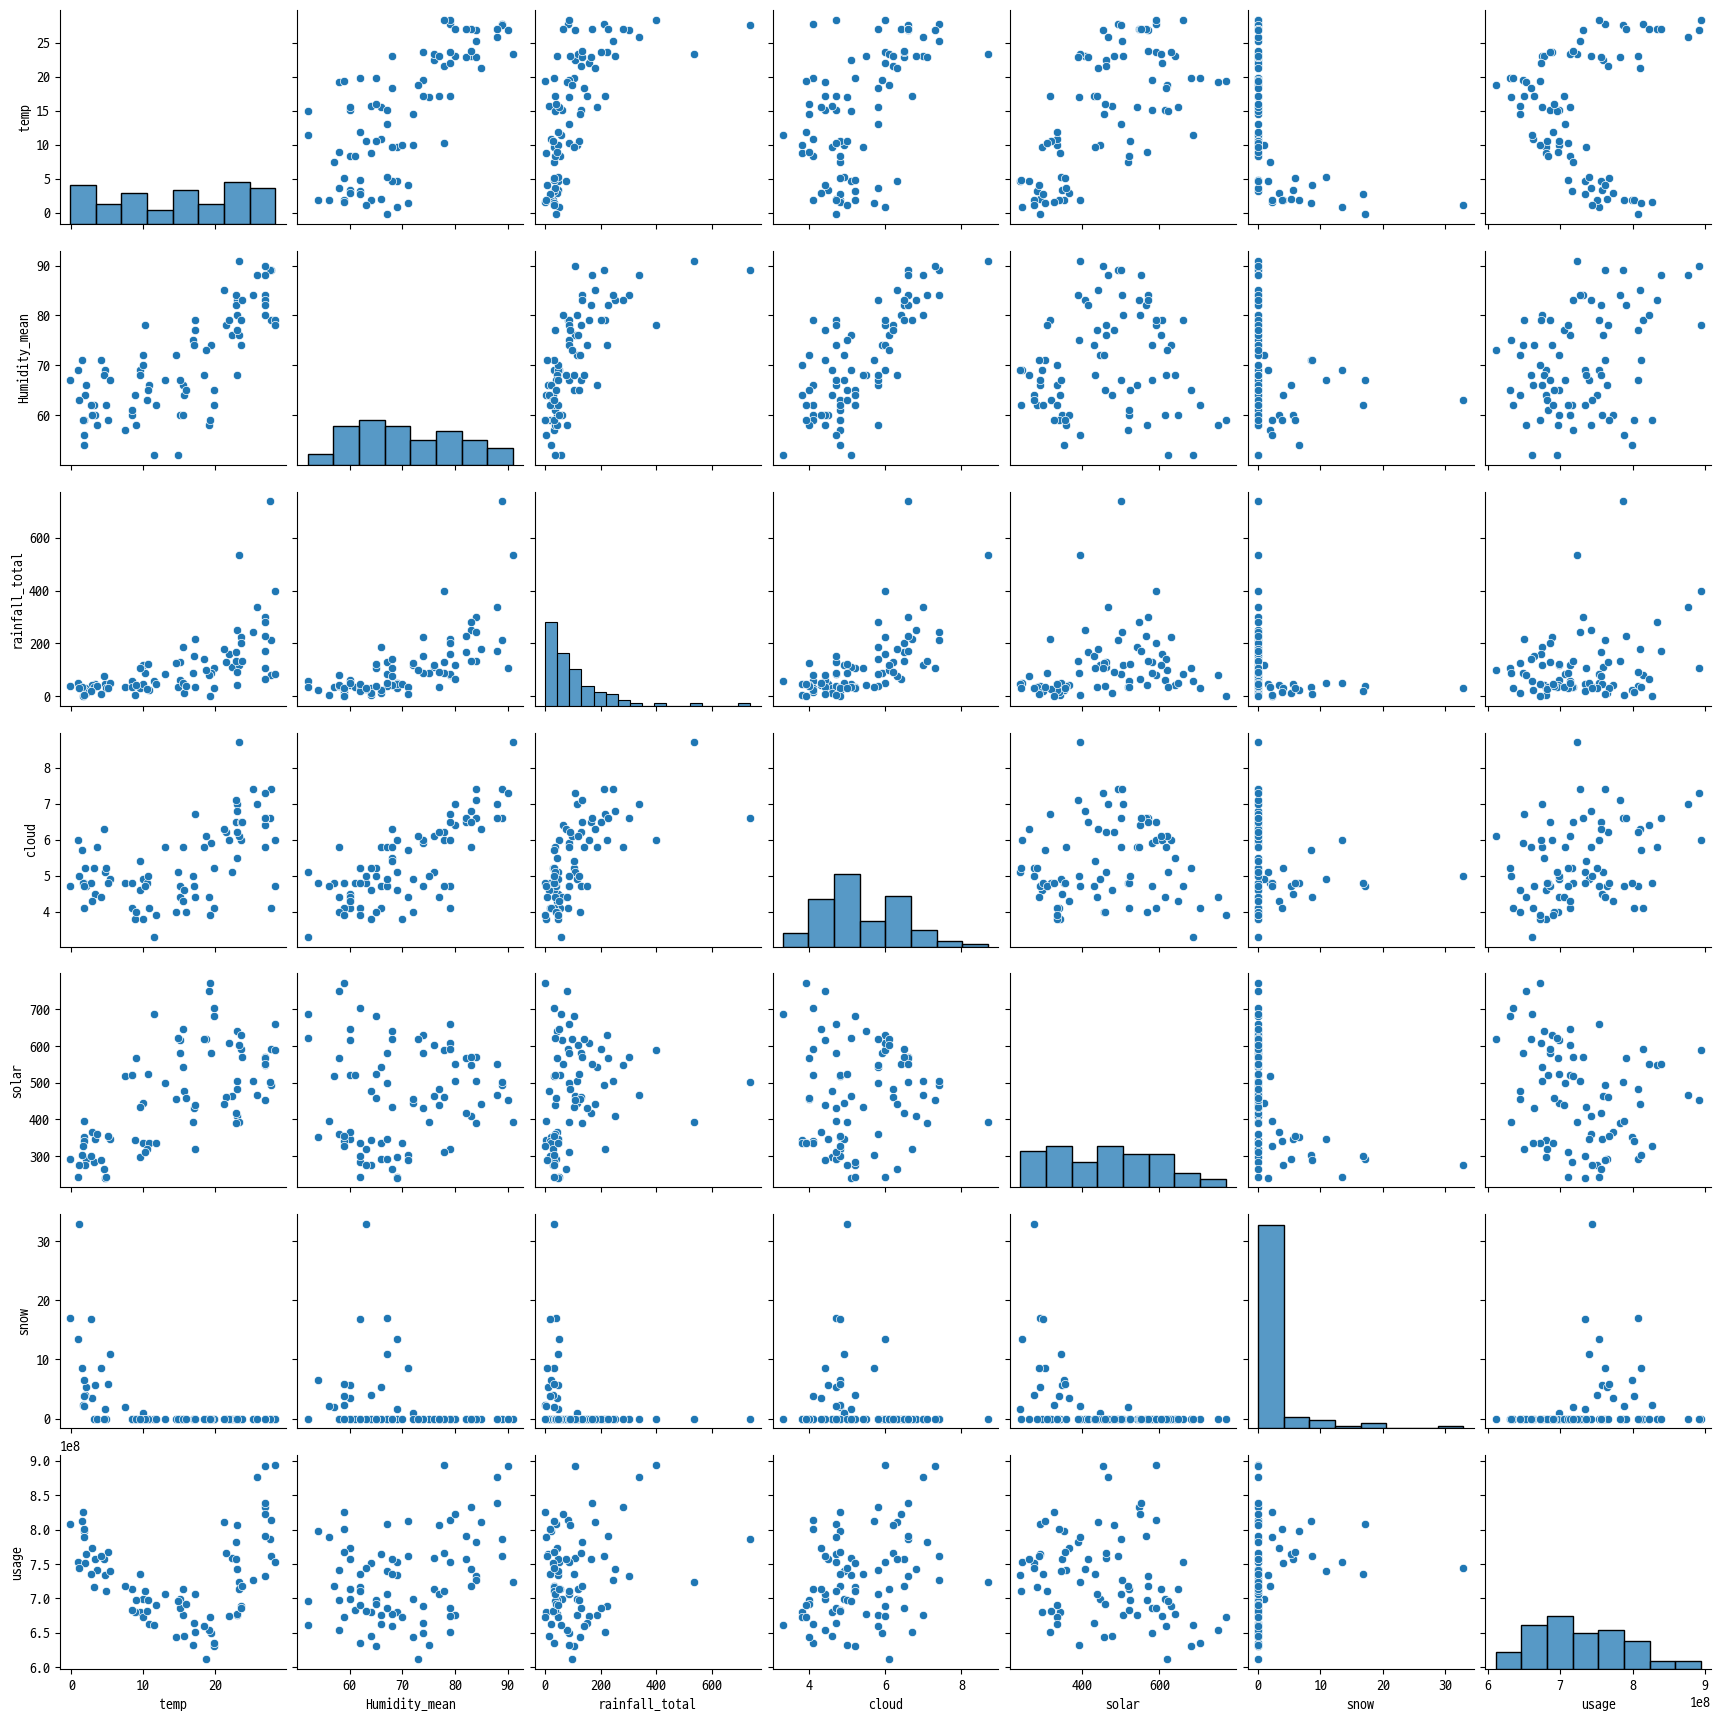

In [106]:
sns.pairplot(df, vars=['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'])

In [107]:
weather_df = ['rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
       # Scatter plot 생성
       scatter = go.Scatter(x=df['temp'], y=df['usage'], mode='markers', 
                            marker=dict(size=df['Humidity_mean'],
                                   color=df[feature], colorscale='Viridis'))

       # 레이아웃 생성
       layout = go.Layout(title='날씨와 전력량에 따른 관계    원크기 : 습도     색상 : ' + col_label[feature],
                          xaxis={'title': '기온'}, 
                            yaxis={'title': '전력량'}, hovermode='closest')

       # 그래프 생성
       fig = go.Figure(data=[scatter], layout=layout)

       # 그래프 출력
       fig.show()

In [108]:
weather_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
    fig = px.scatter(df,
                    x="temp",
                    y="usage",
                    title='날씨와 전력량에 따른 관계',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'usage': '전력량', feature: col_label[feature]})
    fig.show()

In [127]:
weather_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
    # Box plot 생성
    box = go.Box(x=df[feature], y=df['usage'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kw)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [132]:
weather_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=df['temp'], y=df['usage'], z=df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량 데이터                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kw)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

Text(0.5, 1.0, '날씨와 전력량 데이터')

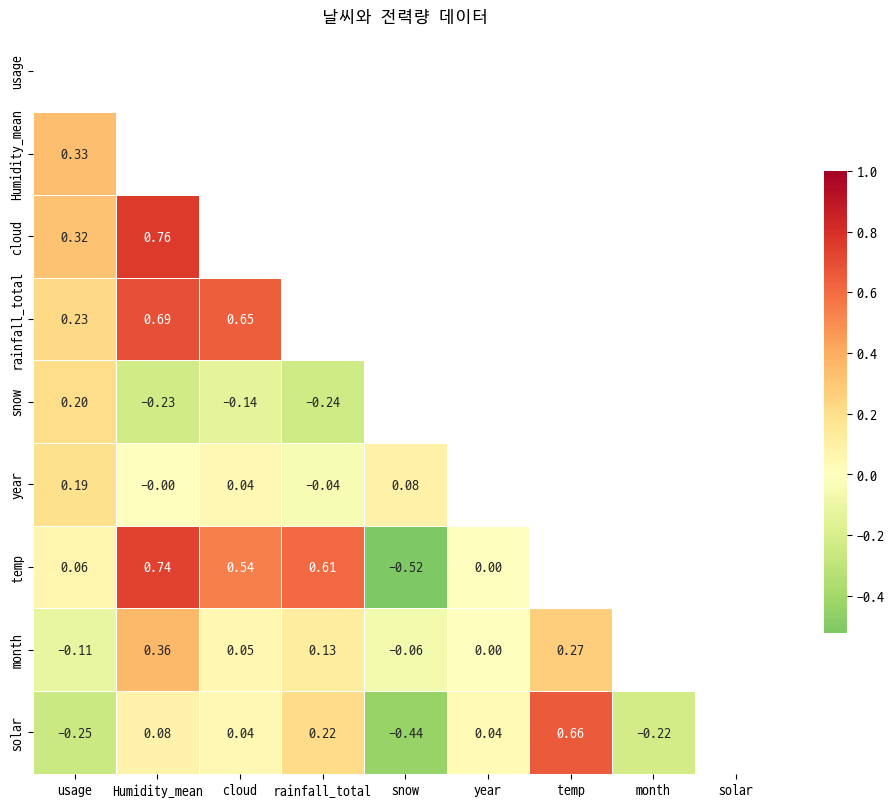

In [113]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = df.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력량 데이터")

In [138]:
weather_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_df:
    # Line plot 생성
    line_plot = px.line(df, x='temp', y='usage', color=feature, 
                        title='날씨와 전력량 데이터', 
                        labels={'temp': '기온', 'usage': '전력량', feature: col_label[feature]})

# 그래프 출력
line_plot.show()

SyntaxError: invalid syntax (3397114497.py, line 6)